> ### EEE4423: Deep Learning Lab

# LAB \#5: Low-level vision: FSRCNN

<h4><div style="text-align: right"> Due date: April 06, 2023.  </div> <br>
<div style="text-align: right"> Please upload your file @ LearnUs by 9 AM in the form of [Name_ID_lab5.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span> 
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2019142079] [성재진]</span> </h2>

In [2]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2023-04-05 23:13:24.009541


## Super-resolution with CNN

### 1. What is super-resolution?

> **Image super-resolution is a technique which enhances an image quality in terms of spatial resolution.**
> 
> 1. **Low Resolution (LR) Image** : Pixel density within an image is small, hence it offers few details.
> 2. **High Resolution (HR) Image** : Pixel density within an image is large, hence it offers a lot of details.
>
> **Super-resolution** reconstructs a high-resolution image (with restored details) from a low-resolution image.

<img src="https://docs.google.com/uc?export=download&id=1gBsghghJw7JTeRhp3D2drGqLsOtnVTri" alt="no_image" style="width: 900px;"/>

### 2. Why deep learning?

> **Learning based methods outperform simple interpolations or hand-designed methods.**
>
> 1. **Simple Interpolations** : Easy to implement (e.g., bicubic), but give poor visual quality, since the details are hard to be preserved.
> 2. **Hand-designed methods** : Involve several steps (e.g., sparse coding and dictionary learning), but not all of them can be optimized.
> 3. **Deep learning (CNN)** : Steps in the hand-designed methods can be combined into one big step with all of its parts being optimizable.
> 
<img src="https://docs.google.com/uc?export=download&id=1cDMjb9MWBzk4QvNDgQfSs94NfXacTKem" alt="no_image" style="width: 900px;"/>

### 3. SRCNN and FSRCNN

> **One of the pioneering works using CNNs to solve the super-resolution task.**
> 
> 1. **SRCNN**
>> - Starts with a bicubic-upsampled image.
>> - Convolutions are performed to improve a quality of the image.
>
> 2. **FSRCNN**
>> - Starts with a low-resolution image. (Hence faster.)
>> - Convolutions are performed in low-resolution spaces followed by a deconvolution which enhances spatial resolution.
>
>
> 

<img src="https://docs.google.com/uc?export=download&id=1vARLxgJpZjSebNn64Tj82gavEO31upGH" alt="no_image" style="width: 900px;"/>

### 4. Deconvolution ($\equiv$Transposed Convolution)
> 1. **How to do deconvolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1Yp507Xsmeo4Pv_lhw-3ZFuswc5gykc6z" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1070666mtaV6DhlfpDm4Z4a9KUtwPe1Pm" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> Given a $4\times4$ input, we can generate a $6\times6$ output by using a $3\times3$ filter. <br>
>> (Blue plane : Input feature map.  //  Green plane : Output feature map.) <br>
>> **Warning! : It is not an actual deconvolution!** It just mimics the deconvolution by filter learning. <br>
>> (We suggest you to use the terminology **"transposed convolution"** instead.)
>
> 2. **Why is it called as transposed convolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=17iV0lLh1BOf6pvndoYdp1LDdi-2cQk6k" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1azGuyIfrpIGbLJwgtO9qtpmL_ph_8Hbg" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> In order to generate a single pixel in the output, the input pixels are aggregated by **flipped** version of the filter (see the difference between left & right figures above).
>>
>> <font color="green"> The reason why we call convolving with **flipped** filter as a **transposed** convolution is described here: <br>
>> https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0. <br>
>> TL;DR : When we define a convolution operation by a matrix multiplication between a filter matrix and an input vector, then going backward (i.e., generating an input from an output) can be expressed by a matrix multiplication between **transpose** of the filter matrix and an output vector. </font>
>
> 3. **How to interpret it as a convolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1tpm6yJ3BKUNnqxlN-5NQjVbS_RXGjl8A" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1AGbz3sH8AXtUI8fJQQNtkMYCqsKeVb1s" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> `Conv2d` with **flipped** filter, given that **(filter size - 1) zeros are padded along borders** <br>$\equiv$ `ConvTranspose2d` with **no padding**
>
> 4. **Then, what does the padding mean in the transposed convolution?**
>> <img src="https://docs.google.com/uc?export=download&id=17XWdjYc4zlvVuKgKITSHg-k-t9aFkRgc" alt="no_image" style="width: 850px;"/>
>> It is not an actual padding. It works reversely, that is, it decreases the spatial size of the output.
>>
>> <font color="green"> Note. On the other hand, the argument `output_padding` in `ConvTranspose2d` increases the spatial size of the output. <br>
>> See https://pytorch.org/docs/master/nn.html#torch.nn.ConvTranspose2d for details. </font>
>
> 5. **Lastly, how does a stride work in the transposed convolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1OXw1wpJu3h0-KBhIaJOrPkCM_AvcK97s" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1Z6LswMASPdCyKqTJbi8zf9MCQp4n5WX7" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> The stride is applied on the output space. It mainly determines a factor of increasing. <br>
>> We can interpret it as a `Conv2d` with **flipped** filter, given that **(stride - 1) zeros are padded between input pixels**.

### 5. Implementing FSRCNN

> 1. **Dataset**
>> - 91-image dataset.
>> - Augmented with scaling / roatation / flipping.
>> - Use only Y channel of YCbCr color space.
>> - 64x64 HR image patches.
>> - Scaling factor = 4.
>
> 2. **Network architecture**
>> - FSRCNN (d,s,m) = (56,12,4). Convolutional filter sizes are specified in the figure above.
>> - PReLU activations.
>> - Deconvolution at the last layer (without activation). <br>
>>   The input resolution is $16\times16$ and the output resolution is $64\times64$, in case of scale factor 4.<br>
>>   You should find propoer  arguments (`padding`, `stride`, and `output_padding`) for `ConvTranspose2d`.
>
> 3. **Loss function**
>> - Mean squared error (MSE) loss between estimation & ground-truth: <br>
     ${1\over N} \sum^{N}_{i=1} \lVert F(Y^{i};\theta) - X^{i} \rVert^{2}_{2}$.
>
> 4. **Training**
>> - Weight initialization. <br>
>>   Convolutional weights : ~ $N(0,0.02^2)$ (Different from the paper, but for simplicity). <br>
>>   Convolutional biases : Zero initialization. <br>
>>   Deconvolutional weights : ~ $N(0,0.001^2)$. <br>
>>   Deconvolutional biases : Zero initialization.
>> - Learning rate. <br>
>>   Convolutional parameters : $10^{-3}$. <br>
>>   Deconvolutional parameters : $10^{-4}$.
>> - Optimizer. <br>
>>   Adam optimizer with default parameters ($\beta_{1} = 0.9, \beta_{2} = 0.999$). <br>
>>   (Note. The paper proposes to use the SGD optimizer, but using the Adam optimizer shows faster convergence.)
>> - 51 epochs without learning rate scheduling.
>
> 4. **Evaluation metric**
>> - Peak Signal-to-Noise Ratio (PSNR) : $10 \log_{10} \left( MAX_{I} \over MSE  \right)$.
>> - Measured with Y channel of images.
>
> 

### *References*
[1] https://cv-tricks.com/deep-learning-2/image-super-resolution-to-enhance-photos/ <br>
[2] https://deepsense.ai/using-deep-learning-for-single-image-super-resolution/ <br>
[3] Dong et al., "Learning a deep convolutional network for image super-resolution", *ECCV*, 2014. <br>
[4] Dong et al., "Accelerating the super-resolution convolutional neural network", *ECCV*, 2016. <br>
[5] https://medium.com/apache-mxnet/transposed-convolutions-explained-with-ms-excel-52d13030c7e8 <br>
[6] https://pytorch.org/docs/master/nn.html#torch.nn.ConvTranspose2d

## FSRCNN with PyTorch

In [3]:
import torch
import torch.nn as nn
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt

from misc.lab05.imresize import imresize
import numpy as np
import skimage
import os
import glob
from skimage.io import imread
import skimage

os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Generating training patches (Do NOT run this cell)

In [4]:
# T91_directory = "../dataset/lab05/T91/"
# T91_images = sorted(glob.glob(T91_directory + "*.png"))

# print("The number of training images : ",len(T91_images))

# # Augmentation setting
# SCALE = [1, 0.9, 0.8, 0.7, 0.6, 2]
# ROTATION = [0,1,2,3]
# FLIP = [True,False]
# PATCH_SIZE = 64
# STRIDE = 64
# IS_GRAY = True
# HR_SET = []

# def load_img(filepath, is_gray):
#     img = imread(filepath)
#     ch = img.ndim
#     if ch == 2:
#         img = skimage.color.gray2rgb(img)
#     if is_gray:    
#         img = skimage.color.rgb2ycbcr(img)
#     return img / 255.

# for idx in range(len(T91_images)):
#     print("\r Processing ", idx+1," / ",len(T91_images), end = '')
#     image_directory = T91_images[idx]
#     for f in FLIP:
#         for r in ROTATION:
#             for s in SCALE:
#                  # load image
#                 image = load_img(image_directory, IS_GRAY) # is_gary : YCbCr or RGB
#                  # flipping
#                 if f:
#                     image = np.fliplr(image)
#                  # rotation
#                 image = np.rot90(image, k=r, axes=(0,1))
#                  # scaling
#                 image = imresize(image, scalar_scale = s)
#                 image = image.clip(0,1)
#                 # generate HR patch
#                 h,w,_ = image.shape
#                 for i in range(0, h-PATCH_SIZE, STRIDE):
#                     for j in range(0, w-PATCH_SIZE, STRIDE):
#                         hr_patch = image[i:i+PATCH_SIZE, j:j+PATCH_SIZE, :]
#                         if IS_GRAY:
#                             hr_patch = hr_patch[:,:,0]
#                         HR_SET.append(hr_patch)

# print("\nThe number of training patches : ",len(HR_SET))
# np.save('../dataset/lab05/HR_patches_from_T91.npy', HR_SET)
# print("Training patches are successfully saved")

### Data loader

In [5]:
print('STEP 1: DEFINE DATASET')

class T91_images(Dataset):
    def __init__(self, data_dir = "./dataset-dllab/lab05/HR_patches_from_T91.npy", HR_patch_size = 64, scale_factor = 4):
        super(T91_images, self).__init__()
        self.HR_patches_np = np.load(data_dir) # pre-processed patches
        self.HR_patch_size = HR_patch_size
        self.scale_factor = scale_factor
        
    def __getitem__(self, idx):
        HR_patch_np = self.HR_patches_np[idx] # high resolution patch
        LR_patch_np = imresize(HR_patch_np, scalar_scale = 1.0 / self.scale_factor) # low resolution patch
        BC_patch_np = imresize(LR_patch_np, scalar_scale = self.scale_factor) # bicubic upsampled patch
        
        HR_patch = torch.from_numpy(HR_patch_np).type(torch.FloatTensor)
        LR_patch = torch.from_numpy(LR_patch_np).type(torch.FloatTensor)
        BC_patch = torch.from_numpy(BC_patch_np).type(torch.FloatTensor)
        
        HR_patch = HR_patch.unsqueeze(0) # size : 1(c) x 64(h) x 64(w)
        LR_patch = LR_patch.unsqueeze(0) # size : 1(c) x 16(h) x 16(w)
        BC_patch = BC_patch.unsqueeze(0) # size : 1(c) x 64(h) x 64(w)
                                
        return HR_patch, LR_patch, BC_patch # Y-channel patches
    
    def __len__(self):
        return len(self.HR_patches_np)
    
class Set5(Dataset):
    def __init__(self, data_dir = './dataset-dllab/lab05/Set5/', scale_factor=4):
        super(Set5, self).__init__()
        self.image_filenames = [os.path.join(data_dir, x) for x in sorted(os.listdir(data_dir))]
        self.scale_factor = scale_factor

    def load_img(self, filepath):
        img = skimage.io.imread(filepath)
        ch = img.ndim
        if ch == 2:
            img = skimage.color.gray2rgb(img)
        img = skimage.color.rgb2ycbcr(img)

        return img / 255.
    
    def calculate_valid_crop_size(self, crop_size, scale_factor):
        return crop_size - (crop_size % scale_factor)
    
    def __getitem__(self, idx):
        # load image
        img_np = self.load_img(self.image_filenames[idx])
        
        # original HR image size
        h, w, _ = img_np.shape
                
        # determine valid HR image size with scale factor
        HR_img_w = self.calculate_valid_crop_size(w, self.scale_factor)
        HR_img_h = self.calculate_valid_crop_size(h, self.scale_factor)

        # determine lr_img LR image size
        LR_img_w = HR_img_w // self.scale_factor
        LR_img_h = HR_img_h // self.scale_factor

        HR_img_np = img_np[:HR_img_h,:HR_img_w,:] # high resolution image
        LR_img_np = imresize(HR_img_np, scalar_scale = 1.0/self.scale_factor) # low resolution image
        BC_img_np = imresize(LR_img_np, scalar_scale = self.scale_factor) # bicubic upsampled image
        
        HR_img = torch.from_numpy(HR_img_np).type(torch.FloatTensor).permute(2,0,1) # size : 3(c) x h x w
        LR_img = torch.from_numpy(LR_img_np).type(torch.FloatTensor).permute(2,0,1) # size : 3(c) x (h/scale_factor) x (w/scale_factor)
        BC_img = torch.from_numpy(BC_img_np).type(torch.FloatTensor).permute(2,0,1) # size : 3(c) x h x w
        
        return HR_img, LR_img, BC_img # YCbCr images

    def __len__(self):
        return len(self.image_filenames)

STEP 1: DEFINE DATASET


In [6]:
print('STEP 2: LOADING DATASET')

scale_factor = 4 # 1/4 down scaling

train_dataset = T91_images(data_dir = "./dataset-dllab/lab05/HR_patches_from_T91.npy", HR_patch_size = 64, scale_factor = scale_factor)
test_dataset = Set5(data_dir = "./dataset-dllab/lab05/Set5/", scale_factor = scale_factor)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = 64, 
                                           shuffle = True, num_workers = 4)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = 1, 
                                          shuffle = False)

STEP 2: LOADING DATASET


In [7]:
print(test_loader)

### Visualize a training sample

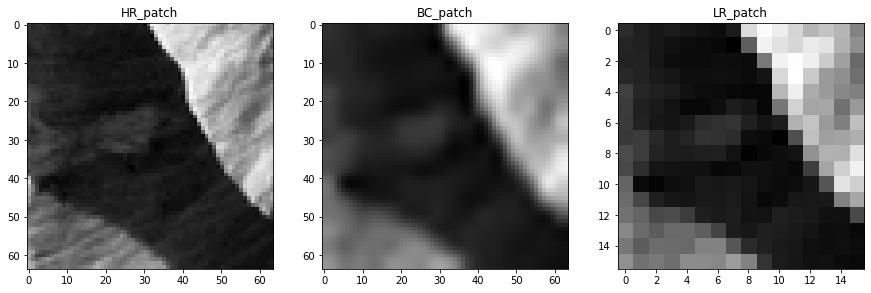

In [8]:
(HR_patch, LR_patch, BC_patch) = train_dataset[100]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(HR_patch.squeeze(0).numpy(), cmap='gray')
ax1.set_title("HR_patch")
ax2.imshow(BC_patch.squeeze(0).numpy(), cmap='gray')
ax2.set_title("BC_patch")
ax3.imshow(LR_patch.squeeze(0).numpy(), cmap='gray')
ax3.set_title("LR_patch")
plt.show()

### 1.1 Write codes for the model (FSRCNN) [4 points]

In [9]:
print('STEP 3: CREATE MODEL CLASS (FSRCNN)')

class FSRCNN(nn.Module):
    def __init__(self, scale_factor = 4):
        super(FSRCNN, self).__init__()
        #############
        # CODE HERE #
        #############
        #주어진 조건에 따르면 d=56, s=12, m=4이다.
        # Feature extraction
        self.feature_extraction = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=56, kernel_size=5, padding=2), #Conv(5,d,1)
            nn.PReLU()
        )
        
        # shrinking
        self.shrinking = nn.Sequential(
            nn.Conv2d(in_channels=56, out_channels=12, kernel_size=1),#Conv(1,s,d)
            nn.PReLU()
            
        )
        
        # non-linear mapping
        self.non_lin_mapping = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1),#Conv(3,s,s),m=4
            nn.PReLU(),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1),
            nn.PReLU(),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1),
            nn.PReLU(),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=1),
            nn.PReLU()
        )
        
        # expanding
        self.expanding = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=56, kernel_size=1),#Conv(1,d,s)
            nn.PReLU()
            
        )
        
        # deconv
        '''
        계산과정은 아래의 링크를 참고하였다.
        https://runebook.dev/ko/docs/pytorch/generated/torch.nn.convtranspose2d
        output(64)=(input(16)-1)xstride(4)-2xpadding+dilation(1)x(kernel_size(9)-1)+output_padding+1
        64=60-2xpadding+9+output_padding
        padding=3 output_padding=1
        '''
        self.deconvolution = nn.Sequential(#Deconv(9,1,s)
            nn.ConvTranspose2d(in_channels=56, out_channels=1, kernel_size=9, stride=scale_factor, padding=3, output_padding=1)
        )
            
    def weight_init(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight.data, mean = 0.0, std = 0.02)
#                 nn.init.kaiming_normal_(m.weight.data, a=0.25) # for SGD
                if m.bias is not None:
                    m.bias.data.zero_()
            if isinstance(m, nn.ConvTranspose2d):
                nn.init.normal_(m.weight.data, mean = 0.0, std = 0.001)
                if m.bias is not None:
                    m.bias.data.zero_()
    
    
    def forward(self, LR_patch):
        #############
        x=self.feature_extraction(LR_patch)
        x=self.shrinking(x)
        x=self.non_lin_mapping(x)
        x=self.expanding(x)
        output=self.deconvolution(x)
        #############
        
        return output

STEP 3: CREATE MODEL CLASS (FSRCNN)


In [10]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model = FSRCNN(scale_factor = scale_factor)
model.weight_init()
num_total_params = sum(p.numel() for p in model.parameters())
print("The number of parameters : ", num_total_params)

#######################
#  USE GPU FOR MODEL  #
#######################
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

STEP 4: INSTANTIATE MODEL CLASS
The number of parameters :  12644


FSRCNN(
  (feature_extraction): Sequential(
    (0): Conv2d(1, 56, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): PReLU(num_parameters=1)
  )
  (shrinking): Sequential(
    (0): Conv2d(56, 12, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=1)
  )
  (non_lin_mapping): Sequential(
    (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): PReLU(num_parameters=1)
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): PReLU(num_parameters=1)
    (4): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): PReLU(num_parameters=1)
    (6): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): PReLU(num_parameters=1)
  )
  (expanding): Sequential(
    (0): Conv2d(12, 56, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=1)
  )
  (deconvolution): Sequential(
    (0): ConvTranspose2d(56, 1, kernel_size=(9, 9), stride=(4, 4), padding=(3, 3), output_padding=(

In [11]:
print('STEP 5: INSTANTIATE OPTIMIZER CLASS')

lr_conv = 1e-3
lr_deconv = 1e-4
# momentum = 0.9

param_conv = list(model.feature_extraction.parameters())+\
             list(model.shrinking.parameters())+\
             list(model.non_lin_mapping.parameters())+\
             list(model.expanding.parameters())

param_deconv = model.deconvolution.parameters()

# optimizer = torch.optim.SGD([{'params':param_conv},
#                              {'params':param_deconv, 'lr':lr_deconv}],
#                              lr = lr_conv, momentum = momentum)

optimizer = torch.optim.Adam([{'params':param_conv}, 
                             {'params':param_deconv, 'lr':lr_deconv}],
                             lr = lr_conv)

STEP 5: INSTANTIATE OPTIMIZER CLASS


### 1.2 Train the FSRCNN model and print PSNR for every epochs [4 points]

In [13]:
import time
print('STEP 6: INSTANTIATE LOSS CLASS')
#############
criterion=nn.MSELoss()
#############


print('STEP 7: TRAIN THE MODEL')

if not os.path.exists("./weights/"):
    os.mkdir("./weights/")

if not os.path.exists("./weights/lab05/"):
    os.mkdir("./weights/lab05/")

num_epochs = 51

def PSNR(pred, gt, s = 0): # input images : 0~1 normalized / s : scale factor
    if pred.is_cuda:
        pred = pred.cpu()
    if gt.is_cuda:
        gt = gt.cpu()
    pred = pred[:,:,s:-s,s:-s] # shave border
    gt = gt[:,:,s:-s,s:-s]
    pred = pred.clamp(0, 1)
    diff = pred - gt
    mse = np.mean(diff.numpy() ** 2)
    if mse == 0:
        return 100
    return 10 * np.log10(1.0 / mse)

for epoch in range(num_epochs):
    # training stage
    model.train()
    total_loss = 0
    start = time.time()
    for i, (HR_patch, LR_patch, BC_patch) in enumerate(train_loader):
        #############
        HR_patch = HR_patch.to(device)
        LR_patch = LR_patch.to(device)
        
        # gradient 값 0으로 초기화
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(LR_patch)

        # Loss 계산: cross entropy loss
        loss = criterion(outputs, HR_patch)

        # back propagation을 통해 gradient 계산
        loss.backward()
        
        total_loss += loss.item()

        # parameters 업데이트
        optimizer.step()
        #############
        
    
    # test stage
    end = time.time()
    model.eval()
    
    # Calculate PSNR
    total_psnr = 0
    total_psnr_bic = 0
    # Iterate through test dataset
    with torch.no_grad():
        for (HR_img, LR_img, BC_img) in test_loader:
            #############
            #measured with y channel images
            # train set은 y채널만 있으므로 [1,3,x,x]를 [1,1,x,x] 꼴로 만들어준다.
            HR_img = HR_img[:,0,:,:].unsqueeze(1).to(device)
            LR_img = LR_img[:,0,:,:].unsqueeze(1).to(device)
            BC_img = BC_img[:,0,:,:].unsqueeze(1).to(device)
            
            outputs = model(LR_img)
            
            total_psnr += PSNR(pred=outputs, gt=HR_img, s=scale_factor)/len(test_loader)
            total_psnr_bic += PSNR(pred=BC_img, gt=HR_img, s=scale_factor)/len(test_loader)

            #############
            
            
        # Print Loss
        print('Epochs: {0}. Loss: {1:.6f}. PSNR: {2:.3f} (bicubic)\t{3:.3f} (FSRCNN)\tElapsed time: {4} sec'.format(epoch, total_loss / (i+1), total_psnr_bic, total_psnr, end-start))
            
    
    # save weights
    if epoch % 5 == 0 and epoch != 0:
        torch.save({'state_dict':model.state_dict()},'./weights/lab05/checkpoint_%03d.pkl'%(epoch))

STEP 6: INSTANTIATE LOSS CLASS
STEP 7: TRAIN THE MODEL
Epochs: 0. Loss: 0.001474. PSNR: 28.432 (bicubic)	28.944 (FSRCNN)	Elapsed time: 24.6744327545166 sec
Epochs: 1. Loss: 0.001460. PSNR: 28.432 (bicubic)	29.133 (FSRCNN)	Elapsed time: 24.589004278182983 sec
Epochs: 2. Loss: 0.001447. PSNR: 28.432 (bicubic)	28.879 (FSRCNN)	Elapsed time: 24.48648691177368 sec
Epochs: 3. Loss: 0.001437. PSNR: 28.432 (bicubic)	29.110 (FSRCNN)	Elapsed time: 24.72000789642334 sec
Epochs: 4. Loss: 0.001418. PSNR: 28.432 (bicubic)	25.925 (FSRCNN)	Elapsed time: 26.207282543182373 sec
Epochs: 5. Loss: 0.001407. PSNR: 28.432 (bicubic)	29.042 (FSRCNN)	Elapsed time: 26.463820695877075 sec
Epochs: 6. Loss: 0.001386. PSNR: 28.432 (bicubic)	29.263 (FSRCNN)	Elapsed time: 25.557992935180664 sec
Epochs: 7. Loss: 0.001358. PSNR: 28.432 (bicubic)	29.368 (FSRCNN)	Elapsed time: 24.67355465888977 sec
Epochs: 8. Loss: 0.001350. PSNR: 28.432 (bicubic)	29.398 (FSRCNN)	Elapsed time: 24.91471767425537 sec
Epochs: 9. Loss: 0.00133

### 1.3 Visualize and compare test examples (RGB color) [2 points]

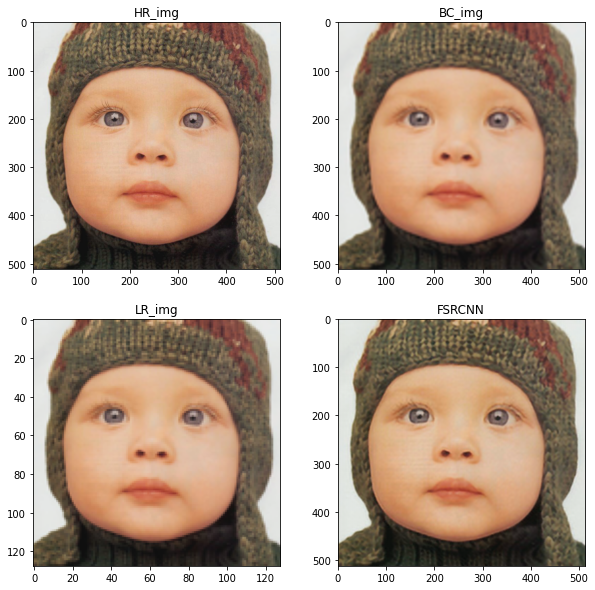

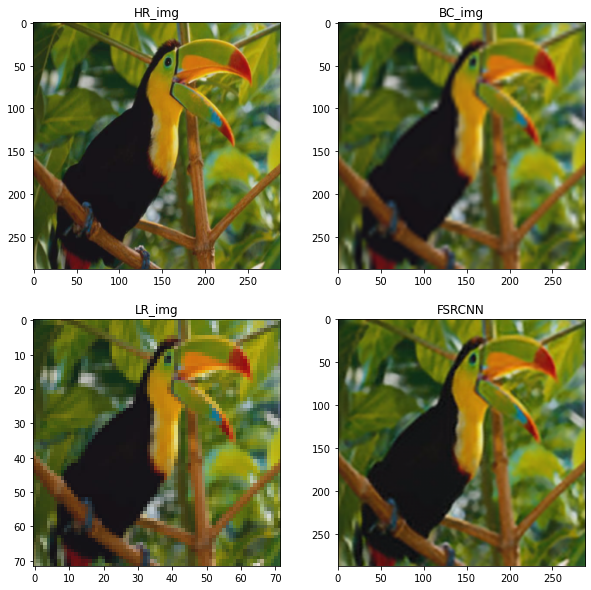

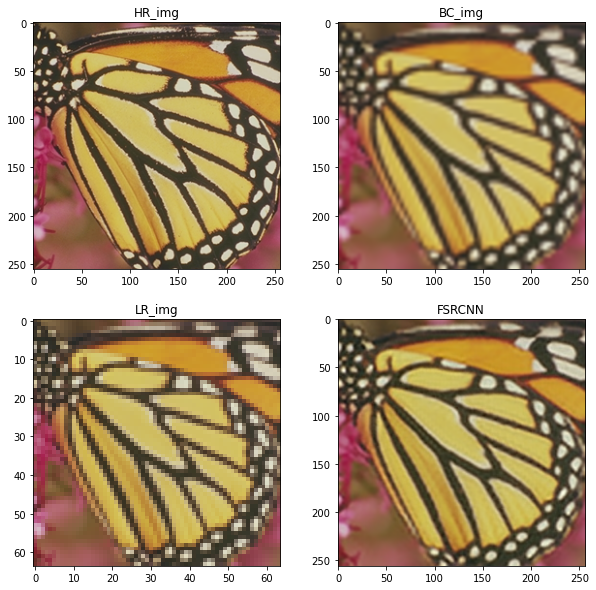

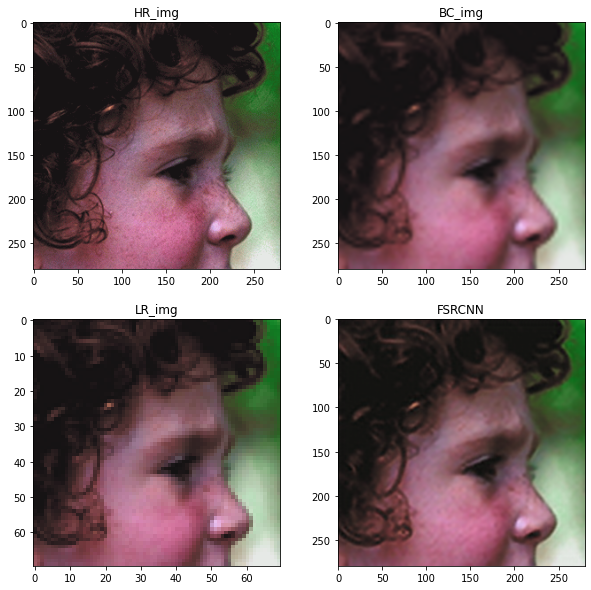

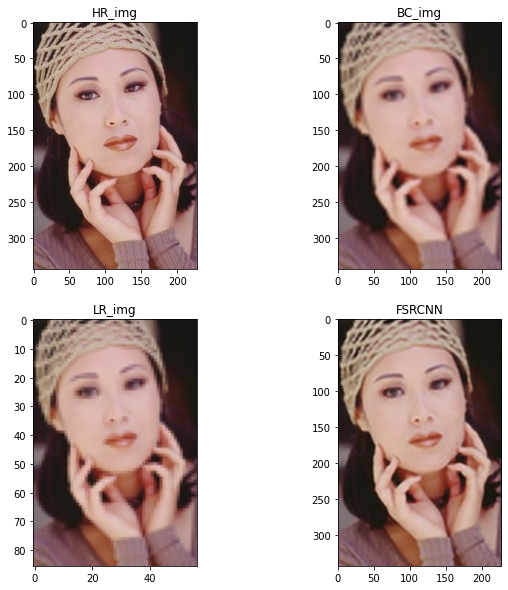

In [14]:
def ycbcr2rgb(im): # input image : ranges from 0 to 255
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

trained_weight = torch.load("./weights/lab05/checkpoint_050.pkl")
model.load_state_dict(trained_weight['state_dict'])
model.eval()

with torch.no_grad():
    for (HR_img, LR_img, BC_img) in test_loader:
        #############
        plt.figure(figsize=(10, 10))
        # HR
        HR_img = HR_img.squeeze()
        HR_img = HR_img.permute(1, 2, 0)#dimension의 순서를 알맞게 바꿔준다.
        HR_img=ycbcr2rgb(HR_img.numpy() * 255)#색상값의 범위에 맞게 바꿔준다.
        plt.subplot(2, 2, 1)
        plt.imshow(HR_img)
        plt.title("HR_img")
        #BC
        BC_img = BC_img.squeeze()
        BC_img = BC_img.permute(1, 2, 0)#dimension의 순서를 알맞게 바꿔준다.
        BC_img=ycbcr2rgb(BC_img.numpy() * 255)#색상값의 범위에 맞게 바꿔준다.
        plt.subplot(2, 2, 2)
        plt.imshow(BC_img)
        plt.title("BC_img")
        #LR
        LR_img_plot = LR_img.squeeze()
        LR_img_plot = LR_img_plot.permute(1, 2, 0)#dimension의 순서를 알맞게 바꿔준다.
        LR_img_plot = ycbcr2rgb(LR_img_plot.numpy() * 255)#색상값의 범위에 맞게 바꿔준다.
        plt.subplot(2, 2, 3)
        plt.imshow(LR_img_plot)
        plt.title("LR_img")
        #FSRCNN
        LR_img = LR_img.permute(1, 0, 2, 3).to(device)#model 적용시키기 위해 gpu사용가능하게
        FSRCNN = model(LR_img).cpu().squeeze()#LR_img에 FSRCNN적용
        FSRCNN = FSRCNN.permute(1, 2, 0)#dimension의 순서를 알맞게 바꿔준다.
        FSRCNN=ycbcr2rgb(FSRCNN.numpy() * 255)#색상값의 범위에 맞게 바꿔준다.
        plt.subplot(2, 2, 4)
        plt.imshow(FSRCNN)
        plt.title("FSRCNN")
        #############
        

# discussion

FSRCNN모델은 재구성한 이미지와 high-resolution이미지의 MSE를 손실 함수로 취하여 저해상도 이미지를 고해상도 이미지로 mapping하는 것을 학습한다. 작은 filter를 사용하는 것과 interpolation 없이 low-resolution image로 학습을 시작하는 것은 학습을 효과적으로 해준다. 주어진 scaling factor는 4이고, 모델의 구성을 살펴보면, deconvolution이 되기 전에는 feature map의 크기가 변화가 없고 deconvolution에서만 4배로 늘어나는 것을 확인할 수 있다.

Peak Signal to Noise Ratio(PSNR) 결과를 살펴보면 FSRCNN이 bicubic interpolated image보다 1.9dB 더 높은 것을 확인할 수 있다. epoch가 증가할수록 FSRCNN의 loss는 감소하고 PSNR은 증가하는 추세를 보이는 것을 볼 수 있다. parameter개수는 12644개로 매우 작다. test example을 살펴보면 BC_img와 LR_img에 비해 FSRCNN이 HR_img에 가까운 고해상도라는 것을 확인할 수 있다.

이번에 생소했던 개념은 YCbCr인데 항상 RGB만 사용하다가 이번에 처음 YCbCr을 써봤다. Y는 휘도 성분이고, Cb와 Cr은 색차 성분이다. 유의해야 할 점은 train set은 Y channel만 존재하지만 test set은 YCbCr channel이 전부 존재하는 것이다.

또한 논문에서 찾아볼 수 없었던 ConvTranspose2d의 padding과 output_padding의 값을 구하는 것도 생소했으나 자료를 찾아서 이해하여 적절한 값을 구하였다.

이번 실험 과정에서 처음 서버 문제를 겪었는데 그동안 일어나지 않은 문제이다 보니 내 코드가 잘못된 것이라는 생각에 빠져 많은 시간을 허비했다. 빠르게 상황판단을 하여 문제를 해결하는 것이 필요하다 느꼈다.